Start your notebook here:

In [98]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("../elden_ring_weapon.csv")
data.rename(columns={
    'Name': 'Name',
    'Type': 'Type',
    'Phy': 'Physical',
    'Mag': 'Magic',
    'Fir': 'Fire',
    'Lit': 'Lightning',
    'Hol': 'Holy',
    'Cri': 'Critical',
    'Sta': 'Stance',
    'Str': 'Strength',
    'Dex': 'Dexterity',
    'Int': 'Intelligence',
    'Fai': 'Faith',
    'Arc': 'Arcane',
    'Any': 'Passive Ability',
    'Phy.1': 'Physical Negation',
    'Mag.1': 'Magic Negation',
    'Fir.1': 'Fire Negation',
    'Lit.1': 'Lightning Negation',
    'Hol.1': 'Holy Negation',
    'Bst': 'Bestial Negation',
    'Rst': 'Resistance',
    'Wgt': 'Weight',
    'Upgrade': 'Upgrade'
}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                307 non-null    object 
 1   Type                307 non-null    object 
 2   Physical            307 non-null    object 
 3   Magic               307 non-null    object 
 4   Fire                307 non-null    object 
 5   Lightning           307 non-null    object 
 6   Holy                307 non-null    object 
 7   Critical            307 non-null    int64  
 8   Stance              307 non-null    int64  
 9   Strength            307 non-null    object 
 10  Dexterity           307 non-null    object 
 11  Intelligence        307 non-null    object 
 12  Faith               307 non-null    object 
 13  Arcane              307 non-null    object 
 14  Passive Ability     307 non-null    object 
 15  Physical Negation   307 non-null    object 
 16  Magic Ne

In [99]:
# convert all number objects to integers
data = data.replace("-", 0)
data = data.replace(r"[()]", "", regex=True)
data["Physical"] = data["Physical"].astype(int)
data["Magic"] = data["Magic"].astype(int)
data["Fire"] = data["Fire"].astype(int)
data["Lightning"] = data["Lightning"].astype(int)
data["Holy"] = data["Holy"].astype(int)
data["Critical"] = data["Critical"].astype(int)
data["Stance"] = data["Stance"].astype(int)
data["Physical Negation"] = data["Physical Negation"].astype(int)
data["Magic Negation"] = data["Magic Negation"].astype(int)
data["Fire Negation"] = data["Fire Negation"].astype(int)
data["Lightning Negation"] = data["Lightning Negation"].astype(int)
data["Holy Negation"] = data["Holy Negation"].astype(int)
data["Bestial Negation"] = data["Bestial Negation"].astype(int)
data["Resistance"] = data["Resistance"].astype(int)
data["Passive Ability"] = data["Passive Ability"].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                307 non-null    object 
 1   Type                307 non-null    object 
 2   Physical            307 non-null    int32  
 3   Magic               307 non-null    int32  
 4   Fire                307 non-null    int32  
 5   Lightning           307 non-null    int32  
 6   Holy                307 non-null    int32  
 7   Critical            307 non-null    int32  
 8   Stance              307 non-null    int32  
 9   Strength            307 non-null    object 
 10  Dexterity           307 non-null    object 
 11  Intelligence        307 non-null    object 
 12  Faith               307 non-null    object 
 13  Arcane              307 non-null    object 
 14  Passive Ability     307 non-null    int32  
 15  Physical Negation   307 non-null    int32  
 16  Magic Ne

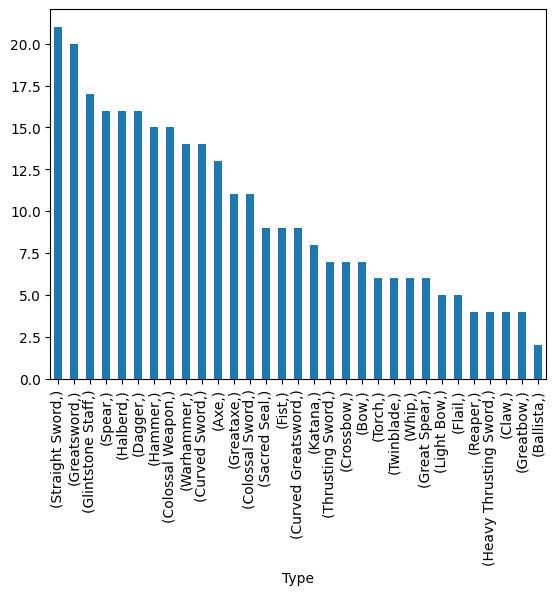

In [100]:
# Plot a graph where it shows how many weopons are there per type
list_types = pd.DataFrame(data["Type"])
count_types = list_types.value_counts().plot(kind="bar")

In [101]:
# make a list of weapon per type
type_counts = pd.DataFrame(list_types.value_counts().rename_axis("Unique Types"))
type_counts

,count
Unique Types,
Straight Sword,21
Greatsword,20
Glintstone Staff,17
Spear,16
Halberd,16
Dagger,16
Hammer,15
Colossal Weapon,15
Warhammer,14


In [103]:
# Display all weapons that scale with Faith
faith_weapons = data[data["Faith"] != 0]
faith_weapons

,Name,Type,Physical,Magic,Fire,Lightning,Holy,Critical,Stance,Strength,...,Passive Ability,Physical Negation,Magic Negation,Fire Negation,Lightning Negation,Holy Negation,Bestial Negation,Resistance,Weight,Upgrade
18,Beastclaw Greathammer,Warhammer,284,0,0,0,183,100,182,C,...,0,62,33,33,33,45,42,20,9.0,Somber Smithing Stones
22,Black Knife,Dagger,161,0,0,0,159,110,56,E,...,0,26,15,15,15,42,15,10,2.0,Somber Smithing Stones
23,Blade of Calling,Dagger,173,0,0,0,105,110,56,D,...,0,31,18,18,18,30,15,10,1.5,Somber Smithing Stones
24,Blasphemous Blade,Greatsword,296,0,191,0,0,100,138,C,...,0,72,39,54,39,39,50,24,13.5,Somber Smithing Stones
45,Cipher Pata,Fist,0,0,0,0,208,100,90,0,...,0,9,14,14,14,61,19,9,0.0,Somber Smithing Stones
46,Clawmark Seal,Sacred Seal,54,0,0,0,0,100,40,B,...,0,25,15,15,15,15,15,10,1.5,Smithing Stones
50,Cleanrot Spear,Spear,249,0,0,0,161,100,80,C,...,0,49,25,25,25,38,33,16,5.5,Somber Smithing Stones
53,Coded Sword,Straight Sword,0,0,0,0,208,100,76,0,...,0,13,22,22,22,58,27,13,2.5,Somber Smithing Stones
56,Cranial Vessel Candlestand,Warhammer,240,0,240,0,0,100,190,B,...,0,71,37,51,37,37,48,23,12.5,Somber Smithing Stones
71,Devourer's Scepter,Warhammer,274,0,169,0,0,100,154,C,...,0,62,33,45,33,33,42,20,11.5,Somber Smithing Stones


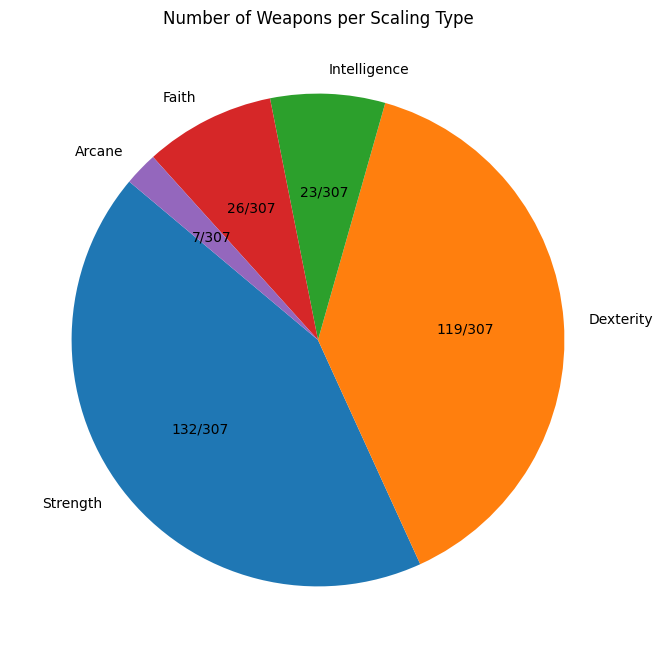

In [105]:
# Display weopon count per scaling type
# Count the non-empty values in each column
scaling_counts = {
    'Strength': data['Strength'].apply(lambda x: x != 0).sum(),
    'Dexterity': data['Dexterity'].apply(lambda x: x != 0).sum(),
    'Intelligence': data['Intelligence'].apply(lambda x: x != 0).sum(),
    'Faith': data['Faith'].apply(lambda x: x != 0).sum(),
    'Arcane': data['Arcane'].apply(lambda x: x != 0).sum()
}

total_weapons = len(data)

# Function to display actual counts and total number of weapons
def autopct_counts(values, total):
    def my_autopct(pct):
        count = int(round(pct*total/100.0))
        return f'{count}/{total}'
    return my_autopct

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(scaling_counts.values(), labels=scaling_counts.keys(), autopct=autopct_counts(scaling_counts.values(), total_weapons), startangle=140)
plt.title('Number of Weapons per Scaling Type')
plt.show()